In [2]:
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd 
from pandas_datareader import data

In [3]:
#stock_list = yf.Ticker["ANZ.AX", "WBC.AX", "CBA.AX", "NAB.AX", "MQG.AX"]

In [4]:
#hist = stock_list.history

In [7]:
fin_stk = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "ANZ.AX WBC.AX CBA.AX NAB.AX MQG.AX",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "6mo",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  5 of 5 completed


In [9]:
fin_stk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2020-01-07 to 2020-07-07
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (MQG.AX, Open)    127 non-null    float64
 1   (MQG.AX, High)    127 non-null    float64
 2   (MQG.AX, Low)     127 non-null    float64
 3   (MQG.AX, Close)   127 non-null    float64
 4   (MQG.AX, Volume)  127 non-null    int64  
 5   (CBA.AX, Open)    127 non-null    float64
 6   (CBA.AX, High)    127 non-null    float64
 7   (CBA.AX, Low)     127 non-null    float64
 8   (CBA.AX, Close)   127 non-null    float64
 9   (CBA.AX, Volume)  127 non-null    int64  
 10  (WBC.AX, Open)    127 non-null    float64
 11  (WBC.AX, High)    127 non-null    float64
 12  (WBC.AX, Low)     127 non-null    float64
 13  (WBC.AX, Close)   127 non-null    float64
 14  (WBC.AX, Volume)  127 non-null    int64  
 15  (ANZ.AX, Open)    127 non-null    float64
 16  (ANZ.AX, High)    127 non

In [10]:
nab_stk = fin_stk.iloc[:,23]
maq_stk = fin_stk.iloc[:,3]
anz_stk = fin_stk.iloc[:,18]
wst_stk = fin_stk.iloc[:,13]
cba_stk = fin_stk.iloc[:,8]

In [11]:
fin_stk_cl= pd.DataFrame({"Nab Close":nab_stk, 
                          "CBA Close": cba_stk,
                         "ANZ Close": anz_stk,
                         "Westpac Close":wst_stk,
                         "Maq Close": maq_stk})
fin_stk_cl

,Nab Close,CBA Close,ANZ Close,Westpac Close,Maq Close
Date,,,,,
2020-01-07,24.459551,79.400749,24.950001,24.620001,137.120224
2020-01-08,24.380966,79.107399,24.860001,24.540001,136.127533
2020-01-09,24.390789,79.684326,24.889999,24.469999,136.746735
2020-01-10,24.489021,80.671951,25.120001,24.650000,137.945847
2020-01-13,24.489021,80.652397,25.010000,24.590000,137.110397
...,...,...,...,...,...
2020-07-01,18.559999,69.879997,18.879999,18.280001,120.739998
2020-07-02,18.900000,71.099998,19.260000,18.610001,121.959999
2020-07-03,18.740000,71.570000,19.190001,18.540001,122.019997


In [15]:
fin_stk_cl.to_csv("tofivestk.csv", sep=",")

In [21]:
five_stk = pd.read_csv("tofivestk.csv")


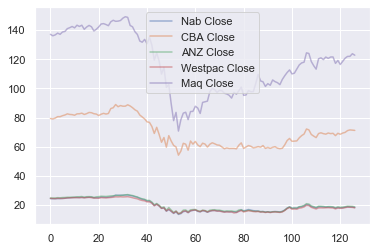

In [23]:
five_stk.plot(alpha=0.5)
